In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dataframe = pd.read_csv("Dados-medicos.csv", delim_whitespace=True, usecols=[0,1,2,3])
dataframe.columns = ["Idade", "Peso", "CargaFinal", "MaxVO2"]
dataframe.head()

,Idade,Peso,CargaFinal,MaxVO2
0,49,79.1,250.0,49.051833
1,30,52.4,177.0,41.603053
2,56,65.8,140.0,32.674772
3,29,78.0,400.0,59.102564
4,49,69.2,242.0,48.410405


<Figure size 432x288 with 0 Axes>

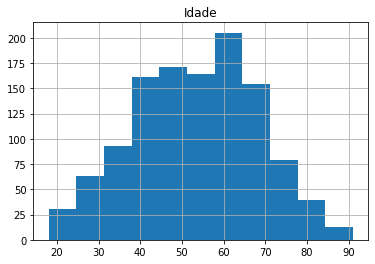

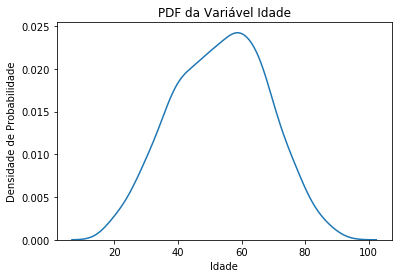

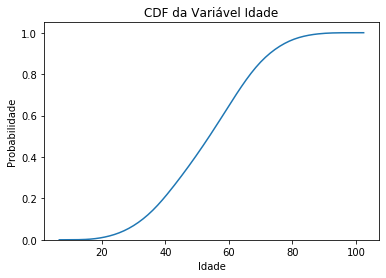

<Figure size 432x288 with 0 Axes>

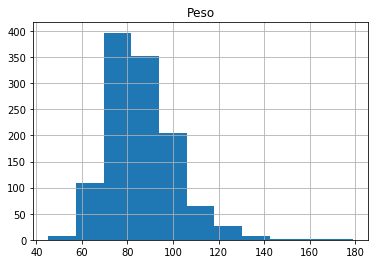

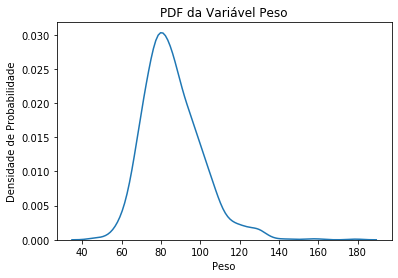

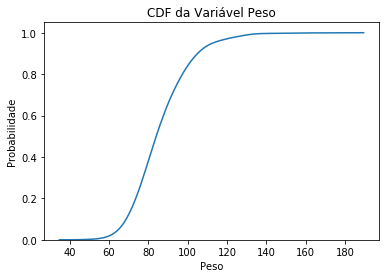

<Figure size 432x288 with 0 Axes>

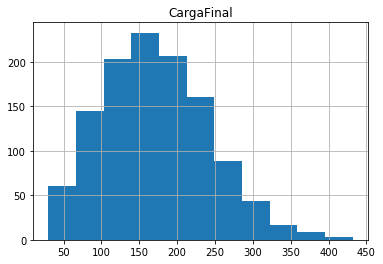

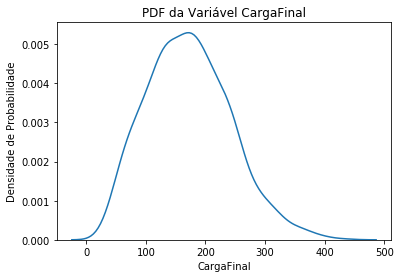

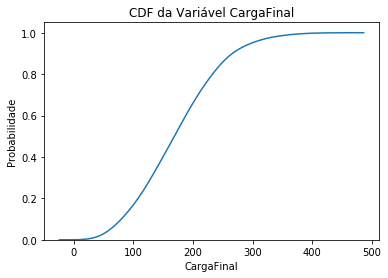

<Figure size 432x288 with 0 Axes>

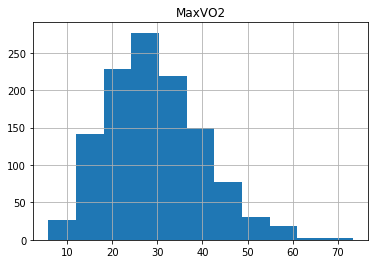

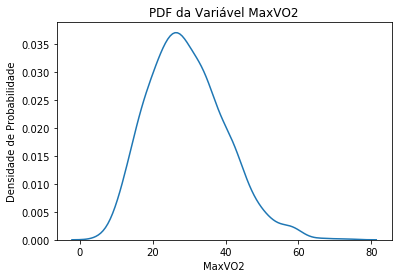

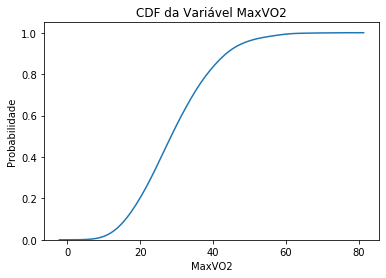

In [24]:
from math import log10

for (columnName) in dataframe.columns:
    count = dataframe[columnName].count()
    bin_size = int(1+3.3*log10(count))
    
    plt.figure()
    histogram = dataframe.hist(column=columnName, bins=bin_size)
    plt.savefig("Graficos/Histogramas/Histograma-" + columnName)
    
    plt.figure()
    plt.title('PDF da Variável ' + columnName)
    plt.xlabel(columnName)
    plt.ylabel('Densidade de Probabilidade')
    x = dataframe[columnName].to_numpy()
    sns.distplot(x, hist=False)
    plt.savefig("Graficos/PDF/PDF-" + columnName)
    
    plt.figure()
    plt.title('CDF da Variável ' + columnName)
    plt.xlabel(columnName)
    plt.ylabel('Probabilidade')
    x = dataframe[columnName].to_numpy()
    kwargs = {'cumulative': True}
    sns.distplot(x, kde_kws=kwargs, hist=False)
    plt.savefig("Graficos/CDF/CDF-" + columnName)

In [3]:
dataframe.describe()

,Idade,Peso,CargaFinal,MaxVO2
count,1172.000000,1172.000000,1172.000000,1172.000000
mean,53.290956,85.925776,172.271502,29.394728
std,14.746297,14.799113,70.093124,10.497250
min,18.000000,45.300000,30.000000,5.846847
25%,42.000000,76.100000,120.000000,21.797423
50%,54.000000,83.700000,170.000000,28.326660
75%,64.000000,94.450000,220.000000,35.853793
max,91.000000,178.900000,432.000000,73.333333


Média da variável Idade 53.29095563139932
Variância da variável Idade 217.4532742354336



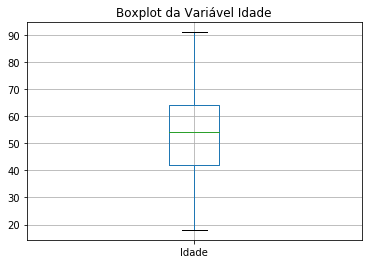

Média da variável Peso 85.92577645051215
Variância da variável Peso 219.01375695425295



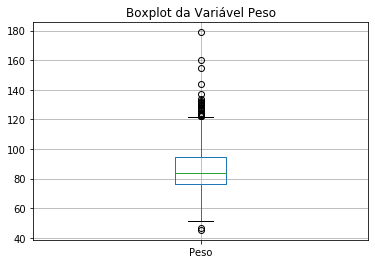

Média da variável CargaFinal 172.27150170648466
Variância da variável CargaFinal 4913.045984762595



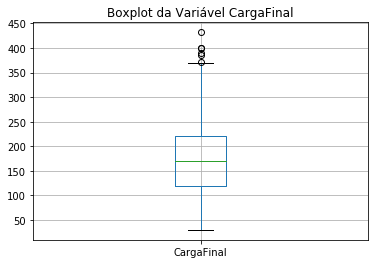

Média da variável MaxVO2 29.394727923153184
Variância da variável MaxVO2 110.19225532503246



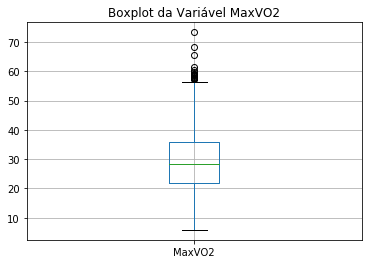

In [27]:
from math import sqrt

for columnName in dataframe.columns:
    print("Média da variável " + columnName + " " + str(dataframe[columnName].mean()))
    print("Variância da variável " + columnName + " " + str((dataframe[columnName].std())**2) + "\n")
    plt.figure()
    plt.title("Boxplot da Variável " + columnName)
    dataframe.boxplot(column=[columnName])
    plt.savefig("Graficos/Boxplot/Boxplot-" + columnName)
    plt.show()

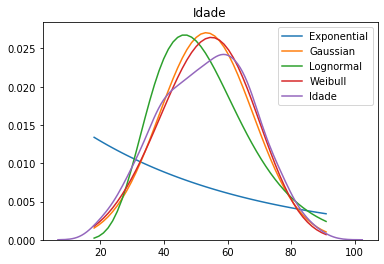

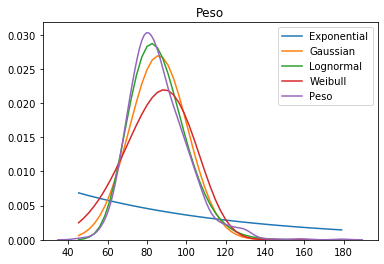

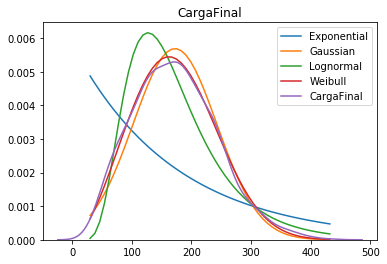

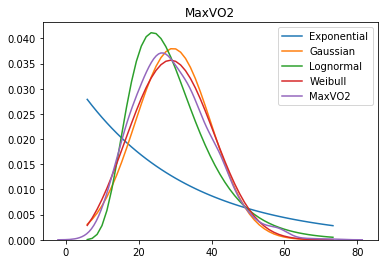

In [29]:
from math import pi
from scipy import stats

for columnName in dataframe.columns:
    intervalo = (np.linspace(dataframe[columnName].min(),dataframe[columnName].max()))
    
    columnMin = dataframe[columnName].min()
    columnMax = dataframe[columnName].max()
    step = (columnMax - columnMin)/(50)
    interval = pd.Series([columnMin + i*step for i in range(51)])
    #print(interval)
    
    lambda_exp_mle = (1/dataframe[columnName].mean())
    exp = ((lambda_exp_mle*interval).tolist())
    exp = [exp[i]*(-1) for i in range(len(exp))]
    exp = np.exp(exp)
    exponential = lambda_exp_mle * exp
    plt.figure()
    plt.plot(interval, exponential, label="Exponential")
    
    mu_gauss_mle = dataframe[columnName].mean()
    sigma_gauss_mle = dataframe[columnName].std()    
    termo1 = sigma_gauss_mle*(sqrt(2*pi))
    termo2 = (interval - mu_gauss_mle)/sigma_gauss_mle
    gaussian = (1/(termo1))*np.exp(-(1/2)*(termo2**2))
    plt.plot(interval, gaussian, label="Gaussian")
    
    mu_log_mle = sum(np.log(dataframe[columnName]))/dataframe[columnName].count()
    sigma2_log_mle = sum((np.log(dataframe[columnName])-mu_log_mle)**2)/dataframe[columnName].count()
    sigma = sqrt(sigma2_log_mle)
    termo1 = (1/interval)
    termo2 = (1/(sigma*sqrt(2*pi)))
    termo3 = np.exp(-(((np.log(interval) - mu_log_mle)**2)/(2*sigma2_log_mle)))
    lognormal = termo1*termo2*termo3
    plt.plot(interval, lognormal, label="Lognormal")
    
    shape, loc, scale = stats.weibull_min.fit(dataframe[columnName], floc=0)
    
    dist = stats.weibull_min(shape, loc, scale)
    plt.plot(interval, dist.pdf(interval), label="Weibull")
    
    sns.kdeplot(dataframe[columnName])
    plt.title(columnName)
    plt.savefig("Graficos/Distribuicoes/"+columnName)
    plt.legend()
    

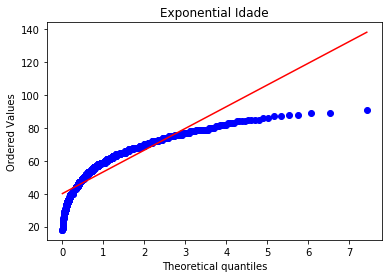

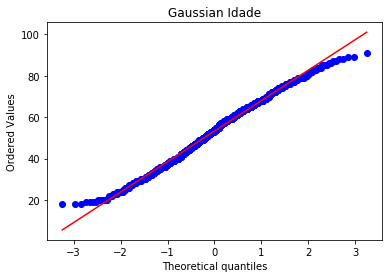

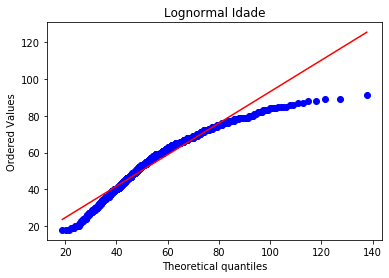

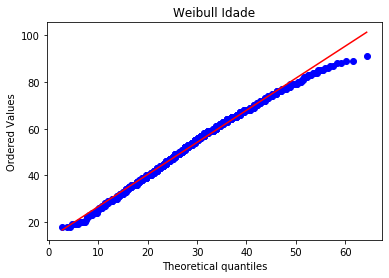

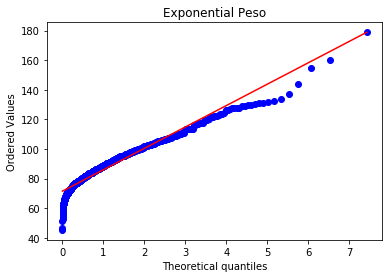

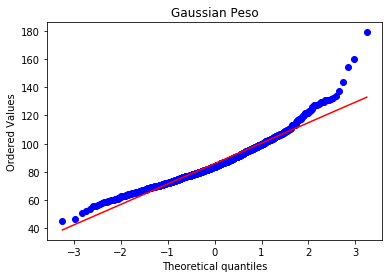

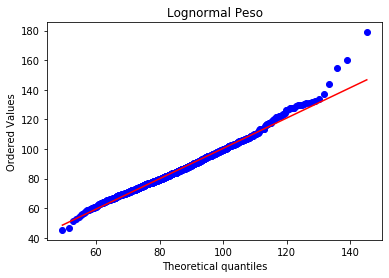

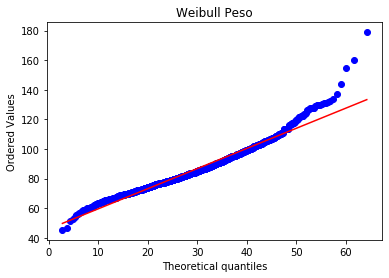

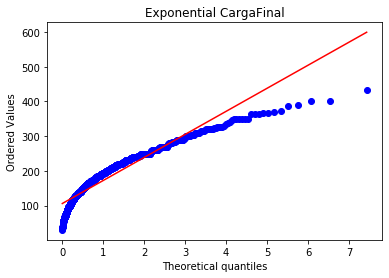

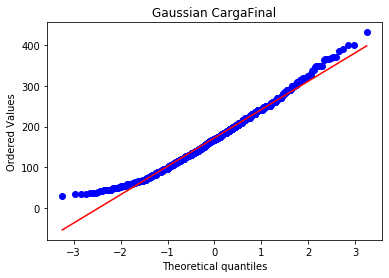

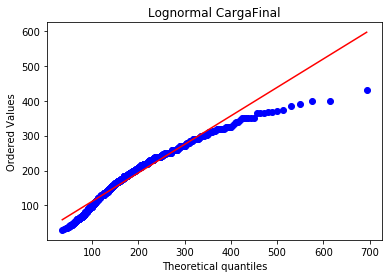

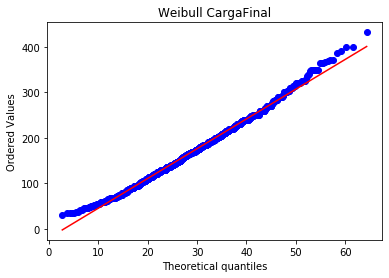

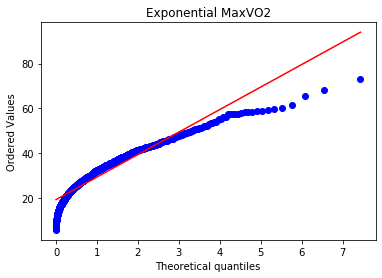

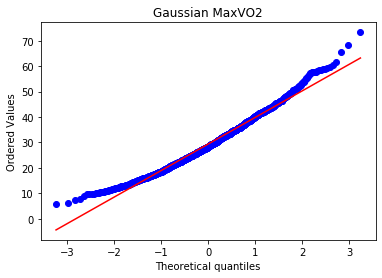

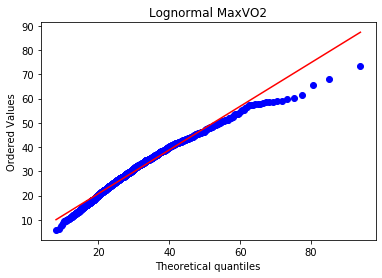

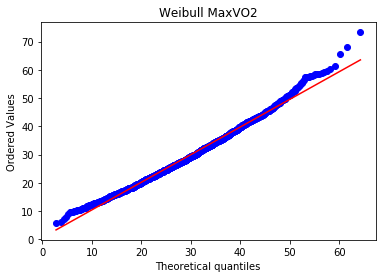

In [30]:
for columnName in dataframe.columns:
    
    plt.figure()
    stats.probplot(dataframe[columnName], dist='expon', plot=plt)
    plt.title("Exponential " + columnName)
    plt.savefig("Graficos/QQPlot/QQ-Exponential-"+columnName)
    
    
    plt.figure()
    stats.probplot(dataframe[columnName], dist='norm', plot=plt)
    plt.title("Gaussian " + columnName)
    plt.savefig("Graficos/QQPlot/QQ-Gaussian-"+columnName)
    
    plt.figure()
    sparams = (stats.lognorm.fit(dataframe[columnName], floc=0))
    stats.probplot(dataframe[columnName], dist='lognorm', sparams=sparams, plot=plt)
    plt.title("Lognormal " + columnName)
    plt.savefig("Graficos/QQPlot/QQ-Lognormal-"+columnName)
    
    plt.figure()
    stats.probplot(dataframe[columnName], dist='weibull_min', sparams=(shape,loc,scale), plot=plt)
    plt.title("Weibull " + columnName)
    plt.savefig("Graficos/QQPlot/QQ-Weibull-"+columnName)
    

In [7]:
for columnName in dataframe.columns:
    
    print(columnName + "\n")
    
    print("    Kolmogorov-Smirnov - Exponential")
    params = stats.expon.fit(dataframe[columnName],floc=0)
    print("    " + str(stats.kstest(dataframe[columnName], 'expon', params)))
    print("\n")
    
    print("    Kolmogorov-Smirnov - Gaussian")
    params = stats.norm.fit(dataframe[columnName])
    print("    " + str(stats.kstest(dataframe[columnName], 'norm', params)))
    print("\n")
    
    print("    Kolmogorov-Smirnov - LogNormal")
    params = stats.lognorm.fit(dataframe[columnName],floc=0)
    print("    " + str(stats.kstest(dataframe[columnName], 'lognorm', params)))
    print("\n")
    
    print("    Kolmogorov-Smirnov - Weibull")
    params = stats.weibull_min.fit(dataframe[columnName],floc=0)
    print("    " + str(stats.kstest(dataframe[columnName], 'weibull_min', params)))
    print("\n")

Idade

    Kolmogorov-Smirnov - Exponential
    KstestResult(statistic=0.372755615059967, pvalue=1.1092520093640775e-146)


    Kolmogorov-Smirnov - Gaussian
    KstestResult(statistic=0.04408368872194113, pvalue=0.02039175142101984)


    Kolmogorov-Smirnov - LogNormal
    KstestResult(statistic=0.084730460447627, pvalue=9.073029891408715e-08)


    Kolmogorov-Smirnov - Weibull
    KstestResult(statistic=0.033037815723893305, pvalue=0.15145170475997996)


Peso

    Kolmogorov-Smirnov - Exponential
    KstestResult(statistic=0.4954410013455397, pvalue=3.358574509201242e-266)


    Kolmogorov-Smirnov - Gaussian
    KstestResult(statistic=0.06661818817785059, pvalue=5.75842350736874e-05)


    Kolmogorov-Smirnov - LogNormal
    KstestResult(statistic=0.032285259002662436, pvalue=0.17003957723540433)


    Kolmogorov-Smirnov - Weibull
    KstestResult(statistic=0.1032173331741221, pvalue=2.5226220819374233e-11)


CargaFinal

    Kolmogorov-Smirnov - Exponential
    KstestResult(statistic=

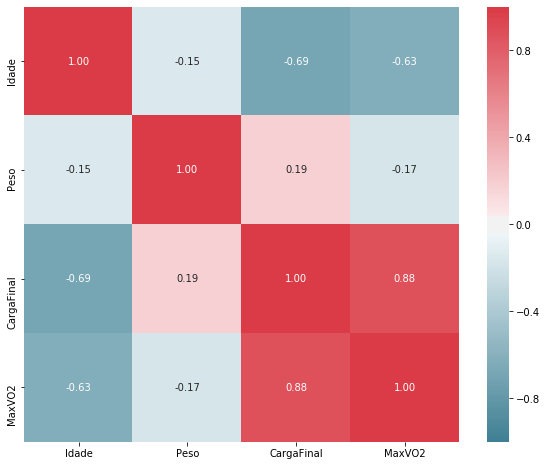

In [31]:
f, ax = plt.subplots(figsize=(10, 8))
corr = dataframe.corr()
correlation_matrix = sns.heatmap(corr, annot = True, fmt = ".2f", vmin=-1, vmax=1, center=0, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig("Graficos/Correlation/CorrelationMatrix")

-0.6300720192503418
-0.174400618296308
0.8783256094059615


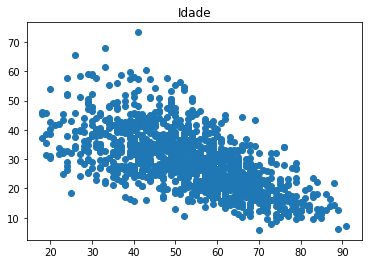

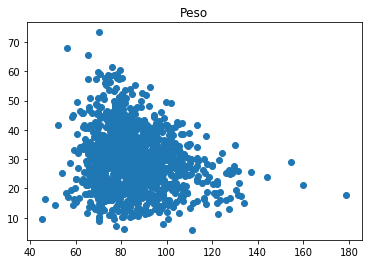

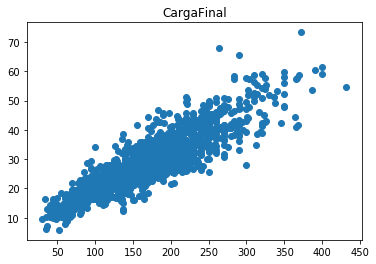

In [33]:
for column in ["Idade", "Peso", "CargaFinal"]:
    correlation = np.corrcoef(dataframe[column], dataframe["MaxVO2"])[0][1]
    print(correlation)
    
    
    plt.figure()
    plt.title(column)
    plt.scatter(dataframe[column], dataframe["MaxVO2"])
    plt.savefig("Graficos/Correlation/Scatter-"+column)

In [10]:
def getHypothesis(dataframe, column):
    result = {}
    minValue = dataframe[column].min()
    maxValue = dataframe[column].max()
    step = ((maxValue - minValue)/8)
    for i in range(9):
        result[i] = minValue + step*i
    return result


hypothesis = getHypothesis(dataframe, "CargaFinal")
getHypothesis(dataframe, "CargaFinal")

{0: 30.0,
 1: 80.25,
 2: 130.5,
 3: 180.75,
 4: 231.0,
 5: 281.25,
 6: 331.5,
 7: 381.75,
 8: 432.0}

In [11]:
def getPrior(dataframe, column):
    result = {}
    hypothesis = getHypothesis(dataframe, column)
    totalCount = dataframe[column].count()
    for i in range(8):
        priorRangeCount = dataframe[(dataframe[column] >= hypothesis[i]) & (dataframe[column] < hypothesis[i+1])]
        result[i] = priorRangeCount["CargaFinal"].count()/totalCount
    return result

prior = getPrior(dataframe, "CargaFinal")

In [12]:
def getLikelihood(dataframe, column, valueRange):
    """
        bool valueRange: 0 if MaxVO2 < 35 or 1 if MaxVO2 >= 35
    """
    result = {}
    hypothesis = getHypothesis(dataframe, column)
    prior = getPrior(dataframe, column)
    
    for i in range(8):
        if valueRange == 0:
            likelihoodRangeCount = dataframe[(dataframe[column] >= hypothesis[i]) & \
                                             (dataframe[column] < hypothesis[i+1]) & (dataframe["MaxVO2"] < 35)]
        elif valueRange == 1:
            likelihoodRangeCount = dataframe[(dataframe[column] >= hypothesis[i]) & \
                                             (dataframe[column] < hypothesis[i+1]) & (dataframe["MaxVO2"] >= 35)]
        else:
            return "Valor inválido para valueRange"
        
        result[i] = likelihoodRangeCount["MaxVO2"].count()/(prior[i]*dataframe[column].count())
    
    return result

likelihood0 = getLikelihood(dataframe, "CargaFinal", 0)
likelihood1 = getLikelihood(dataframe, "CargaFinal", 1)

In [13]:
def getBayesNumerator(dataframe, column, valueRange):
    result = {}
    prior = getPrior(dataframe, column)
    likelihood0 = getLikelihood(dataframe, column, 0)
    likelihood1 = getLikelihood(dataframe, column, 1)
    for i in range(8):
        if valueRange == 0:
            result[i] = prior[i]*likelihood0[i]
        elif valueRange == 1:
            result[i] = prior[i]*likelihood1[i]
        else:
            return "Valor inválido para valueRange"
    return result

bayesNum0 = getBayesNumerator(dataframe, column, 0)
bayesNum1 = getBayesNumerator(dataframe, column, 1)

In [14]:
def getPosterior(dataframe, column, valueRange):
    result = {}
    bayesNumerator0 = getBayesNumerator(dataframe, column, 0)
    bayesNumerator1 = getBayesNumerator(dataframe, column, 1)
    for i in range(8):
        if valueRange == 0:
            result[i] = bayesNumerator0[i]/sum(bayesNumerator0.values())
        elif valueRange == 1:
            result[i] = bayesNumerator1[i]/sum(bayesNumerator1.values())
        else:
            return "Valor inválido para valueRange"
    return result

posterior0 = getPosterior(dataframe, column, 0)
posterior1 = getPosterior(dataframe, column, 1)

In [15]:
def getPredictions(dataframe, column):
    result = {}
    posterior = getPosterior(dataframe, column, 0)
    likelihood = getLikelihood(dataframe, column, 1)
    
    for i in range(8):
        result[i] = posterior[i] * likelihood[i]
    return result

prediction = getPredictions(dataframe, "CargaFinal")

In [37]:
print("Tabela 1 - Inferência Bayesiana para VO2 Máximo < 35\n")
print(f' Hypothesis       Prior    Likelihood   BayesNumerator Posterior')
for i in range(8):
    linha = [(hypothesis[i], hypothesis[i+1]), prior[i], likelihood0[i], bayesNum0[i], posterior0[i]]
    hyp, pri, like, bayes, post = linha
    print(f'{hyp}   {pri:>6,.3f}   {like:>9,.2f}   {bayes:>11,.3f}   {post:>9,.3f}')

Tabela 1 - Inferência Bayesiana para VO2 Máximo < 35

 Hypothesis       Prior    Likelihood   BayesNumerator Posterior
(30.0, 80.25)    0.098        1.00         0.098       0.136
(80.25, 130.5)    0.211        1.00         0.211       0.292
(130.5, 180.75)    0.254        0.93         0.237       0.329
(180.75, 231.0)    0.241        0.62         0.148       0.206
(231.0, 281.25)    0.128        0.19         0.025       0.034
(281.25, 331.5)    0.049        0.05         0.003       0.004
(331.5, 381.75)    0.015        0.00         0.000       0.000
(381.75, 432.0)    0.003        0.00         0.000       0.000


In [39]:
print("Tabela 2 - Inferência Bayesiana para VO2 Máximo >= 35\n")
print(f' Hypothesis       Prior    Likelihood   BayesNumerator Posterior')
for i in range(8):
    linha = [(hypothesis[i], hypothesis[i+1]), prior[i], likelihood1[i], bayesNum1[i], posterior1[i]]
    hyp, pri, like, bayes, post = linha
    print(f'{hyp}   {pri:>6,.3f}   {like:>9,.2f}   {bayes:>11,.3f}   {post:>9,.2f}')

Tabela 2 - Inferência Bayesiana para VO2 Máximo >= 35

 Hypothesis       Prior    Likelihood   BayesNumerator Posterior
(30.0, 80.25)    0.098        0.00         0.000        0.00
(80.25, 130.5)    0.211        0.00         0.000        0.00
(130.5, 180.75)    0.254        0.07         0.017        0.06
(180.75, 231.0)    0.241        0.38         0.092        0.33
(231.0, 281.25)    0.128        0.81         0.103        0.37
(281.25, 331.5)    0.049        0.95         0.047        0.17
(331.5, 381.75)    0.015        1.00         0.015        0.05
(381.75, 432.0)    0.003        1.00         0.003        0.01


In [18]:
print("Tabela 3 - Inferência Bayesiana para P[VO2 Máximo >= 35 | VO2 Máximo < 35]\n")
print(f' Hypothesis       Prior    Likelihood1   BayesNumerator Posterior Likelihood2 Prediction')
for i in range(8):
    linha = [(hypothesis[i], hypothesis[i+1]), prior[i], likelihood0[i], bayesNum0[i], posterior0[i], likelihood1[i], prediction[i]]
    hyp, pri, like, bayes, post, like1, pred = linha
    print(f'{hyp}   {pri:>6,.2f}   {like:>9,.2f}   {bayes:>11,.2f}   {post:>11,.2f} {like1:>11,.2f} {pred:>10,.2f}')

Tabela 3 - Inferência Bayesiana para P[VO2 Máximo >= 35 | VO2 Máximo < 35]

 Hypothesis       Prior    Likelihood1   BayesNumerator Posterior Likelihood2 Prediction
(30.0, 80.25)     0.10        1.00          0.10          0.14        0.00       0.00
(80.25, 130.5)     0.21        1.00          0.21          0.29        0.00       0.00
(130.5, 180.75)     0.25        0.93          0.24          0.33        0.07       0.02
(180.75, 231.0)     0.24        0.62          0.15          0.21        0.38       0.08
(231.0, 281.25)     0.13        0.19          0.02          0.03        0.81       0.03
(281.25, 331.5)     0.05        0.05          0.00          0.00        0.95       0.00
(331.5, 381.75)     0.01        0.00          0.00          0.00        1.00       0.00
(381.75, 432.0)     0.00        0.00          0.00          0.00        1.00       0.00
